# **DIP ASSIGNMENT - 2**
# Srujana Vanka 2020102005

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [418]:
# Importing librabies
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline
from google.colab.patches import cv2_imshow 
import math
import time 

In [ ]:
%cd /content/drive/MyDrive/DIP/images-2/images/
%ls

# **Question 1**

# Blurry Moments

## 1.1

In [ ]:
def padd(img,i,j,k):
  padding=k//2
  r = img.shape[0]
  c = img.shape[1]
  return img[i-padding*1:i+padding+1,j-padding:j+padding+1]

def gaussianBlur(img,sigma,k):
  img = img.astype(np.float64)
  r = img.shape[0]
  c = img.shape[1]
  out = np.zeros(img.shape)
  padding=k//2
  t=(2*sigma**2)

  g=np.zeros((k,k))
  for i in range(-padding, padding+1):
    for j in range(-padding, padding+1):
      x=(i)**2+(j)**2
      d=np.sqrt(x)
      g[i,j]=math.exp(-(d**2)/t)

  for i in range(padding, r-padding):
      for j in range(padding, c-padding):
            temp=padd(img,i,j,k)
            temp=temp.reshape((k,k))
            g=g/(sum(sum(g)))
            out[i][j]=sum(sum(temp*g))
  out = out.astype(np.uint8)
  return out

def masking(img,k,A):
    s = (k-1)/6
    filter = gaussianBlur(img,s,k)
    out = img + (img-filter)*A
    out[out<0] = 0
    out = out.astype('int')
    return out

## Unsharp masking

Text(0.5, 1.0, 'Unsharp Masking with k = 5')

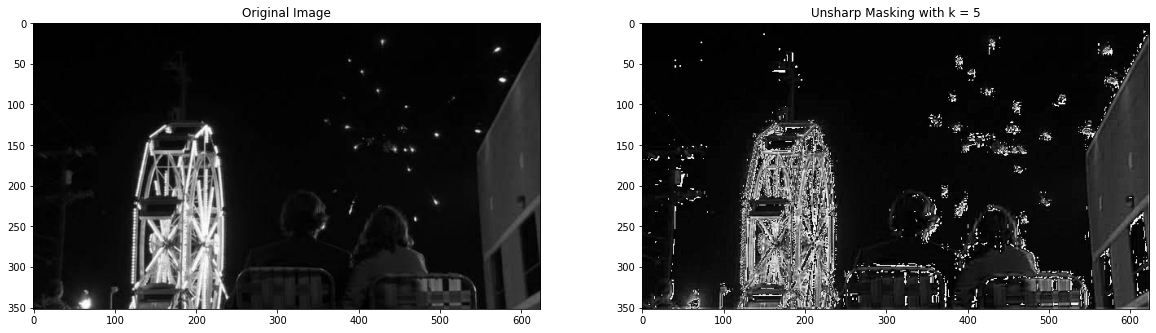

In [ ]:
# Unsharp masking - A = 1 
img = cv2.imread("Jam.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

unsharp_out = masking(img,5,1)
plt.figure(figsize = (20,15))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(unsharp_out,cmap='gray')
plt.title('Unsharp Masking with k = 5')

## Highboost Filtering

Text(0.5, 1.0, 'Highboost Filtering with k = 5')

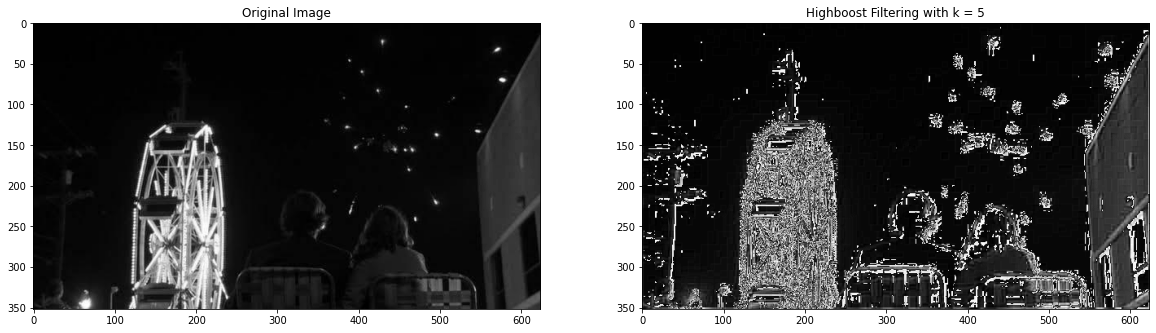

In [ ]:
# Highboost - A != 1 
img = cv2.imread("Jam.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

hb_out = masking(img,5,3)
plt.figure(figsize = (20,15))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(hb_out,cmap='gray')
plt.title('Highboost Filtering with k = 5')

## 1.2

Text(0.5, 1.0, 'Highboost filtering with k = 11, A = 5')

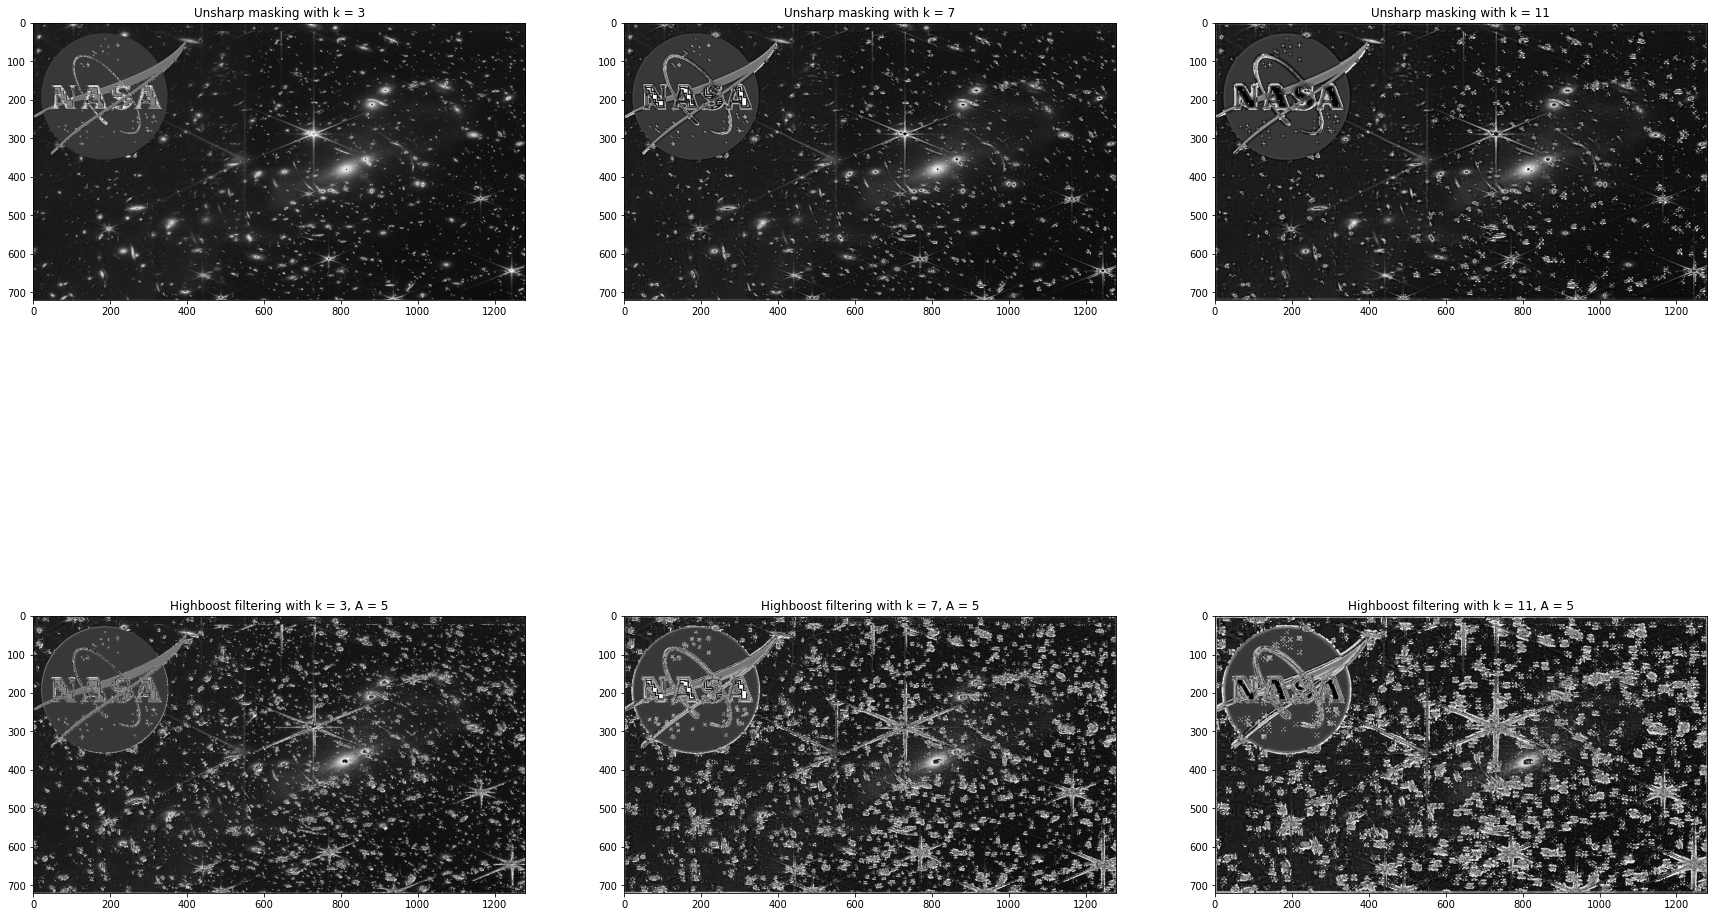

In [ ]:
# Choosing  any three different filter sizes
img = cv2.imread("webb.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 

un1  = masking(img,3,1)
un2 = masking(img,7,1)
un3 = masking(img,11,1)
hb1 = masking(img,3,5)
hb2 = masking(img,7,5)
hb3 = masking(img,11,5)

# Plotting
plt.figure(figsize = (30,20))

plt.subplot(231)
plt.imshow(un1, cmap='gray')
plt.title('Unsharp masking with k = 3')
plt.subplot(232)
plt.imshow(un2,cmap='gray')
plt.title('Unsharp masking with k = 7')
plt.subplot(233)
plt.imshow(un3,cmap='gray')
plt.title('Unsharp masking with k = 11')
plt.subplot(234)
plt.imshow(hb1, cmap='gray')
plt.title('Highboost filtering with k = 3, A = 5')
plt.subplot(235)
plt.imshow(hb2, cmap='gray')
plt.title('Highboost filtering with k = 7, A = 5')
plt.subplot(236)
plt.imshow(hb3, cmap='gray')
plt.title('Highboost filtering with k = 11, A = 5')

### The coefficient A specifies what portion of the mask is to be added. When A=1, it is called Unsharp Masking and when A>1, it is called High boost filtering because we are boosting the high frequency components by giving more weight to the masked image.

### Both these methods are used for edge enhancement.
### As filter size k increases, the unsharp masking's and highboost filter's edges are more evident. 

# **Question 2**

The
bilateral filter takes a weighted sum of the pixels in a local neighborhood; the weights
depend on both the spatial distance and the intensity distance. In this way, edges are
preserved well while noise is averaged out.

The Bilateral filter is given by:


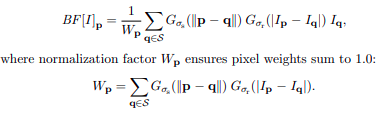

In [ ]:
img = cv2.imread("bil.png")
cv2_imshow(img)

In [ ]:
def padd(img,i,j,k):
  padding=k//2
  r = img.shape[0]
  c = img.shape[1]
  return img[i-padding*1:i+padding+1,j-padding:j+padding+1]

def bilateralFilter(img,sigs,sigr,k):
  # sigs - space factor - size of the considered neighborhood
  # sigr - range factor
  img = img.astype(np.float64)
  r = img.shape[0]
  c = img.shape[1]
  out = np.zeros(img.shape)
  padding=k//2
  t=(2*sigs**2)

  # Gaussian blur 
  g=np.zeros((k,k))
  for i in range(-padding, padding+1):
    for j in range(-padding, padding+1):
      x=(i)**2+(j)**2
      d=np.sqrt(x)
      g[i,j]=math.exp(-(d**2)/t)
  
  # Iterating through all possible values
  for i in range(padding, r-padding):
      for j in range(padding, c-padding):
          for ch in range(3):
            temp=img[i-padding : i+padding+1,   j-padding : j+padding+1,   ch : ch+1]
            temp=temp.reshape((k,k))
            d=temp-img[i][j][ch]
            d=np.exp(-(d**2)/t)
            ker = d*g
            kernel= ker/sum(sum(ker))
            out[i][j][ch]=sum(sum(temp*kernel))
  out = out.astype(np.uint8)
  return out

Text(0.5, 1.0, 'Filtered Image,$\\sigma_s = 1000$, $\\sigma_d = 40$, k=13')

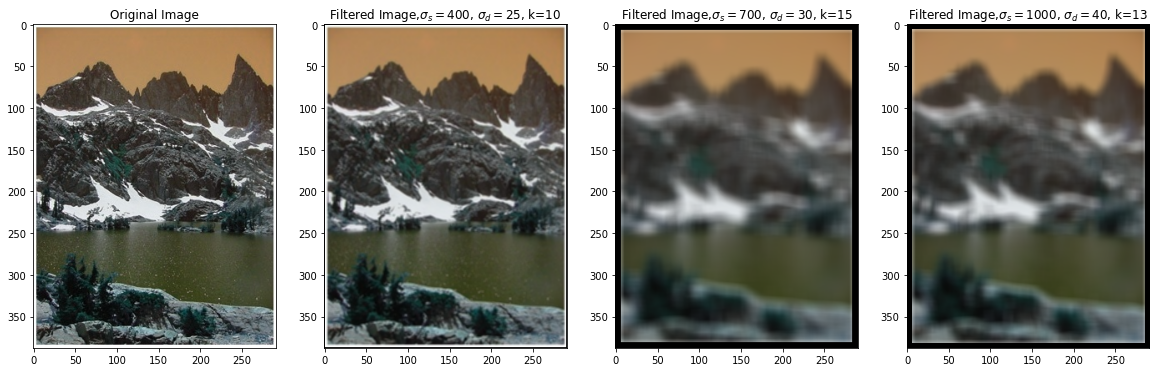

In [ ]:
img = cv2.imread("lakeside.jpg")
output1 = bilateralFilter(img,400,20,3)
output2 = bilateralFilter(img, 700,30,15)
output3 = bilateralFilter(img,1000,40,13)
plt.figure(figsize = (20,15))

plt.subplot(141)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(142)
plt.imshow(output1)
plt.title('Filtered Image,$\sigma_s = 400$, $\sigma_d = 25$, k=10')
plt.subplot(143)
plt.imshow(output2)
plt.title('Filtered Image,$\sigma_s = 700$, $\sigma_d = 30$, k=15')
plt.subplot(144)
plt.imshow(output3)
plt.title('Filtered Image,$\sigma_s = 1000$, $\sigma_d = 40$, k=13')



### - As the range parameter $\sigma_s$ increases, the bilateral filter gradually approaches Gaussian convolution more closely because the range Gaussian widens and flattens, which means that it becomes nearly constant over the intensity interval of the image.

### - As the spatial parameter $\sigma_d$ increases, the larger features get smoothened.

### Therefore, in case of larger sigma,the smoothing is more.

# **Question 3**
# Pam and Graphic Design

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: RuntimeWarning: overflow encountered in ulong_scalars


Text(0.5, 1.0, 'Final image')

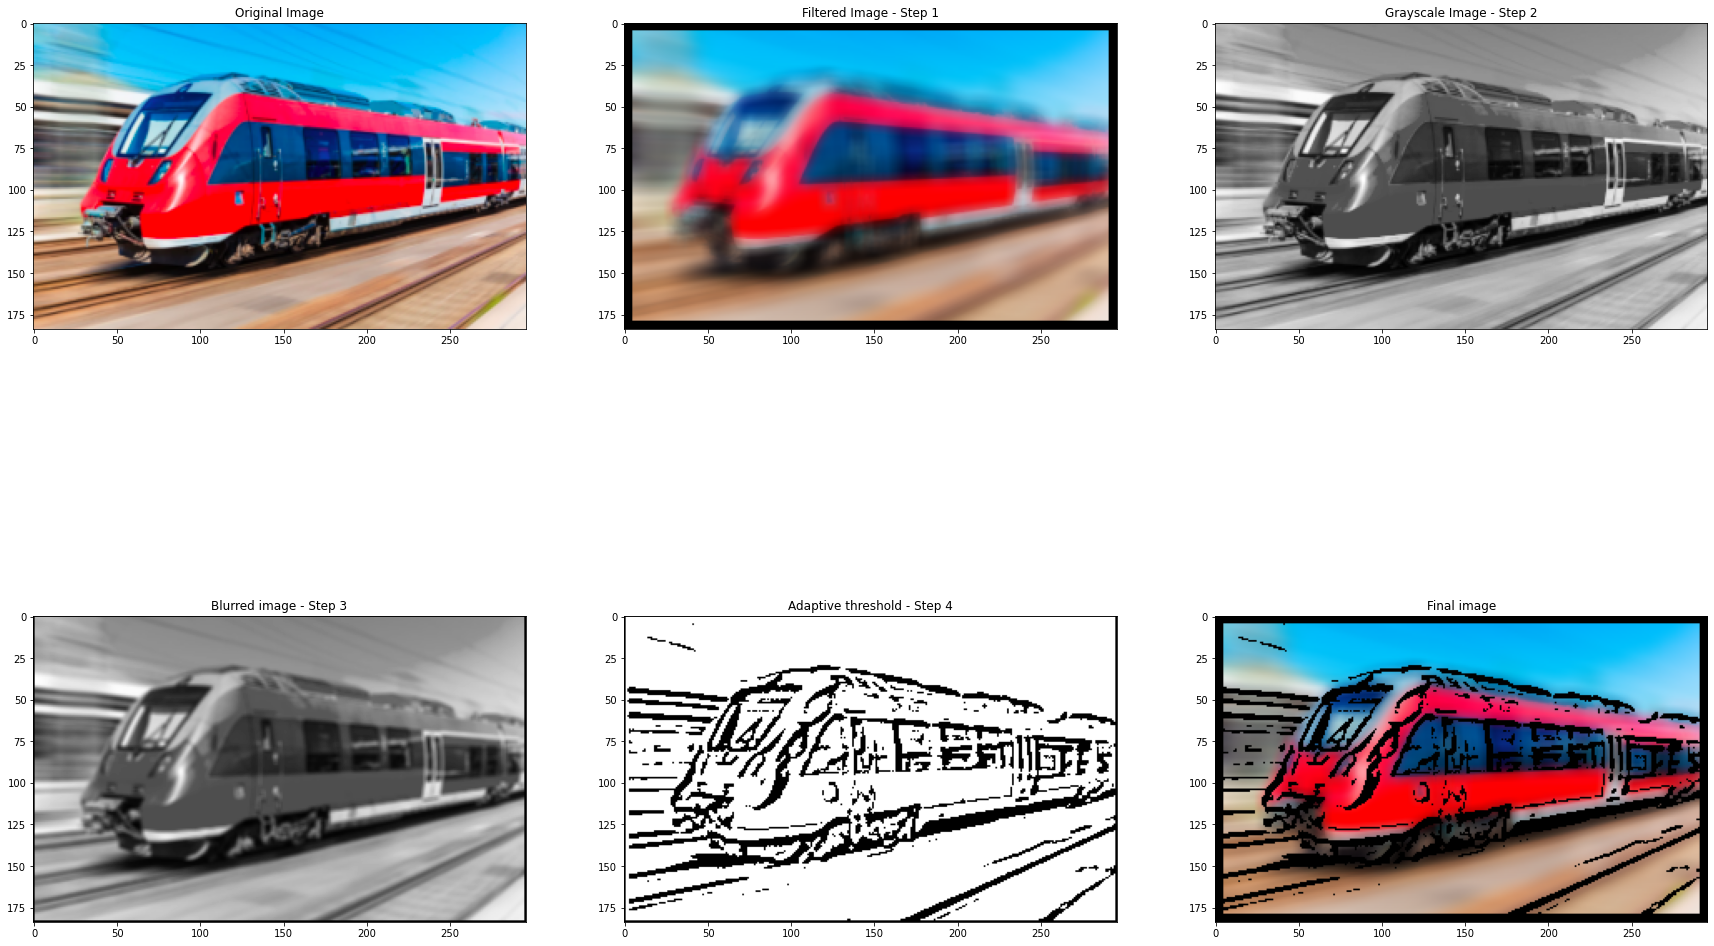

In [ ]:
# Step 1 - apply bilateral filter
img = cv2.imread("temp.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
output_bil = bilateralFilter(img,200,40,11)

# Step 2 - Convert to grayscale
copy = np.copy(img)
output_gray = cv2.cvtColor(copy,cv2.COLOR_RGB2GRAY)

# Step 3 - Apply blurring on this gray scale image to reduce noise
# Median blur
def blurring_mean(img,k):
    h,w = img.shape
    out = np.zeros([h,w])
    padding = np.ones([h+k+1,w+k+1],dtype='int64')
    padding[int((k)/2):int(h+(k-1)/2),int((k)/2):int(w+(k+1)/2)] = img
    kernel = np.zeros([k,k])
    kernel = kernel/sum(sum(sum((kernel))))
    
    for i in range(int((k-1)/2),h+int((k+1)/2)):
        for j in range(int((k-1)/2),w+int((k+1)/2*1)):  
            temp = padding[i-int((k)/2):i+int((k-1)/2)+1,j-int((k-1)/2):j+int((k)/2)+1]
            area = temp.reshape(k,k)  
            out[i-int((k+1)/2)][j-int((k+1)/2)] = int(sum(sum(sum(kernel*area))))
    return out

# Gaussian blur
def padd(img,i,j,k):
  padding=k//2
  r = img.shape[0]
  c = img.shape[1]
  return img[i-padding*1:i+padding+1,j-padding:j+padding+1]

def gaussianBlur(img,sigma,k):
  img = img.astype(np.float64)
  r = img.shape[0]
  c = img.shape[1]
  out = np.zeros(img.shape)
  padding=k//2
  t=(2*sigma**2)

  g=np.zeros((k,k))
  for i in range(-padding, padding+1):
    for j in range(-padding, padding+1):
      x=(i)**2+(j)**2
      d=np.sqrt(x)
      g[i,j]=math.exp(-(d**2)/t)

  for i in range(padding, r-padding):
      for j in range(padding, c-padding):
            temp=padd(img,i,j,k)
            temp=temp.reshape((k,k))
            g=g/(sum(sum(g)))
            out[i][j]=sum(sum(temp*g))
  out = out.astype(np.uint8)
  return out

output_blur = gaussianBlur(output_gray,3,3)

# def var(i,j,s,c,r):
#     x1 = int(max(i-s, 0))
#     x2 = int(min(i+s, c-1))
#     y1 = int(max(j-s, 0))
#     y2 = int(min(j+s, r-1))
#     ans=(y2-y1)*(x2-x1)
#     total =temp[y2, x2]-temp[y1, x2]-temp[y2, x1]+temp[y1, x1]
# Step 4 - Create an edge mask
# Adaptive thresholding makes the assumption that local regions of an image will have more uniform illumination and lighting than the image as a whole. 
def adaptiveThres(img):
    r=img.shape[0]
    c= img.shape[1]
    s=int((c/50)/2)
    T=4.0
    temp=np.zeros_like(img, dtype=np.uint64)
    for i in range(c):
        for j in range(r):
            temp[j,i] = img[0:j,0:i].sum()
    out_img = np.zeros_like(img)    
    # Each small region in the image is given a threshold instead of the whole image having a global threshold.
    for i in range(c):
        for j in range(r):
            x1 = int(max(i-s, 0))
            x2 = int(min(i+s, c-1))
            y1 = int(max(j-s, 0))
            y2 = int(min(j+s, r-1))
            ans=(y2-y1)*(x2-x1)
            total =temp[y2, x2]-temp[y1, x2]-temp[y2, x1]+temp[y1, x1]
            var = total *(100.-T)/100.
            if img[j, i]*ans < var:
                out_img[j,i] = 0
            else:
                out_img[j,i] = 255
    return out_img.astype('uint8')

output_mask = adaptiveThres(output_blur)

# Step - 5 : bitwise-AND of bilateral and adaptive output
ch1 =output_bil[:,:,0].reshape(output_bil.shape[0],output_bil.shape[1])
ch2 =output_bil[:,:,1].reshape(output_bil.shape[0],output_bil.shape[1])
ch3 =output_bil[:,:,2].reshape(output_bil.shape[0],output_bil.shape[1])
output_final=np.zeros(img.shape)
f1 = np.bitwise_and(output_mask,ch1)
f2 = np.bitwise_and(output_mask,ch2)
f3 = np.bitwise_and(output_mask,ch3)
output_final= np.dstack([f1,f2,f3])

# Plotting
plt.figure(figsize = (30,20))

plt.subplot(231)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(232)
plt.imshow(output_bil)
plt.title('Filtered Image - Step 1')
plt.subplot(233)
plt.imshow(output_gray,cmap='gray')
plt.title('Grayscale Image - Step 2')
plt.subplot(234)
plt.imshow(output_blur, cmap='gray')
plt.title('Blurred image - Step 3')
plt.subplot(235)
plt.imshow(output_mask, cmap='gray')
plt.title('Adaptive threshold - Step 4')
plt.subplot(236)
plt.imshow(output_final)
plt.title('Final image')

# **Question 4**
# Dwight for Promotion

## 4.1

The discrete Fourier transform (DFT) of an image f of size M×N is an image F of same size is given by:

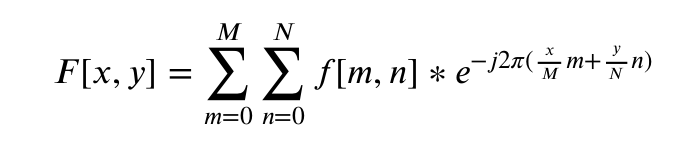

In [ ]:
img = cv2.imread("dft.png")
cv2_imshow(img)

In [ ]:
def dft_2D(f):
    dft = np.zeros(f.shape,dtype='complex64')
    u=f.copy()
    M = f.shape[0]
    N = f.shape[1]
    for i in range(M):
        for j in range(N):
            for m in range(M):
                for n in range(N):
                    val = ((i*m)/M + (j*n)/N)
                    dft[i,j] += f[m,n]*np.exp(-2*(np.pi)*(complex(0,val)))
    return dft

## 4.2

In [ ]:
# 1D dft 
def dft_1d(array):
    n=len(array)
    u=array.copy()
    out = np.arange(0,n,1)
    out = np.outer(out,out)
    F = np.exp( (-1j*2*np.pi*out) /n)
    return F

### - The 2D FFT makes use of the 1D FFT
### - It is done by first calculating the 1D FFT of each of the rows
### - Then, we perform 1D FFT on the columns of the matrix resulting from the above step. The mathematical proof is as follows:


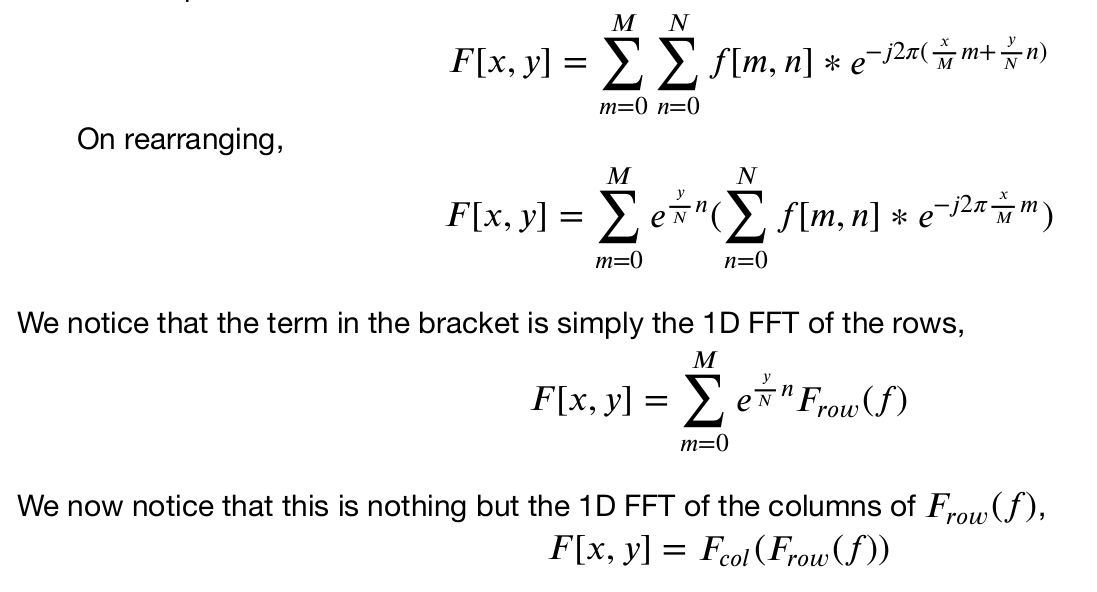

In [ ]:
im = cv2.imread('dft2d_1d.png')
cv2_imshow(im)

In [ ]:
def dft_2d1d(array):
    array = array.astype('complex_')
    h= array.shape[0]
    u=array.copy()
    w= array.shape[1]
    F = np.zeros((h,w), dtype=np.complex_)
    
    # 1D fft of rows
    for i in range(h):
        F[i,:] = dft_1d(array[i,:])[:w]
    F_copy = np.copy(F)
    # 1D fft of columns from above result
    for i in range(w):
        F[:,i] = dft_1d(F_copy[:,i])[:h]
    
    return F

# imgg = cv2.imread('lakeside.jpg')
# imgg = cv2.resize(img,(512,512),cv2.INTER_AREA)
# out = dft_2d1d(imgg)
# cv2_imshow(np.log(1 + np.abs(np.fft.fftshift(out))), cmap='gray')

## 4.4

In [ ]:
# 1D ifft is simply (1/N)*(fft(x'))'
# Where, x' represents the complex conjugate 
def ifft_1d(array):
    N = array.shape[0]
    arr_ = np.conj(array)
    u=array.copy()
    f= np.conj(dft_1d(arr_))[:N]
    return (1/N)*f

def ifft_2d(array):
    arr = array.astype('complex_')
    h,w = arr.shape
    u=array.copy()
    F = np.zeros((h,w), dtype=np.complex_)
    for i in range(h):
        F[i,:] = ifft_1d(arr[int(i),:])[:w]
        F_copy = np.copy(F)
    for i in range(w):
        F[:,i] = (ifft_1d(F_copy[:,int(i)]))[:h]
    return F

## 4.5

Text(0.5, 1.0, 'IFFT')

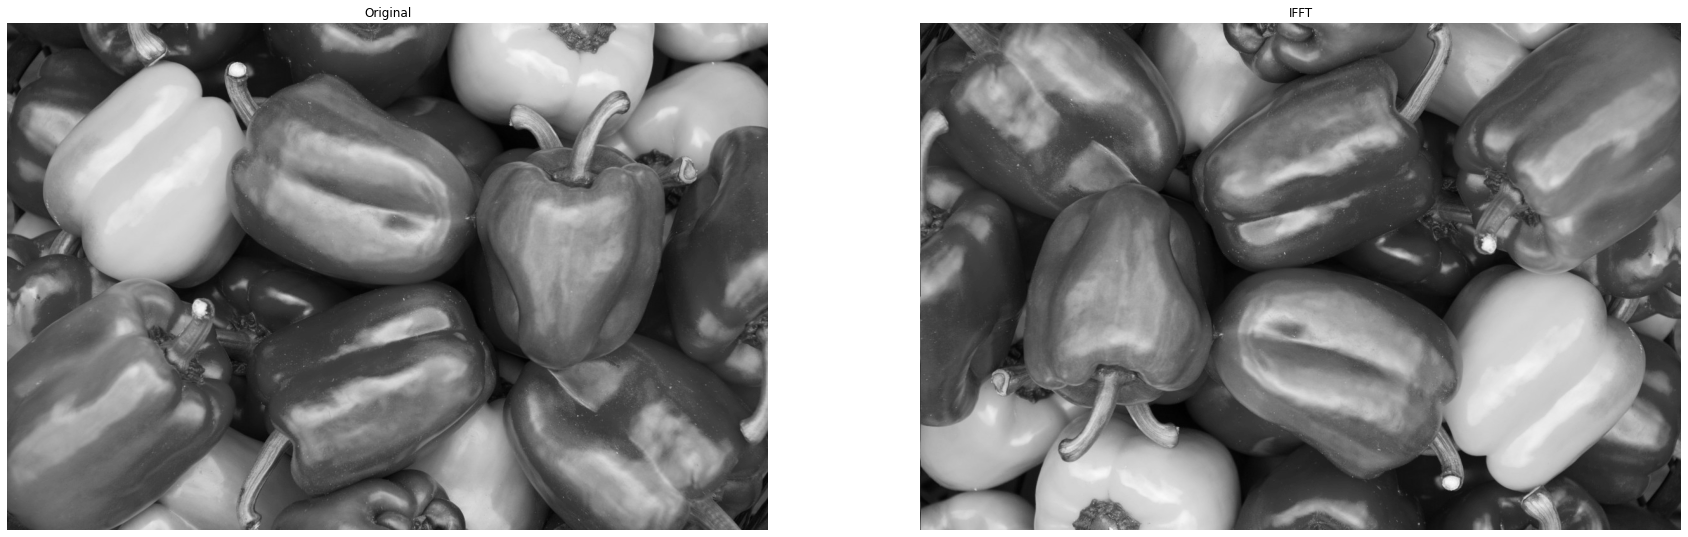

In [ ]:
img = cv2.imread("pepper.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
fftout= np.fft.fft2(img)
ifftout = np.fft.fft2(fftout)

plt.figure(figsize=(30,30))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(122)
plt.imshow(np.real(ifftout),cmap='gray')
plt.axis('off')
plt.title('IFFT')

# **Question 5**
# Focused Dwight

## 5.1

Text(0.5, 1.0, 'Ideal lowpass filter with D=30')

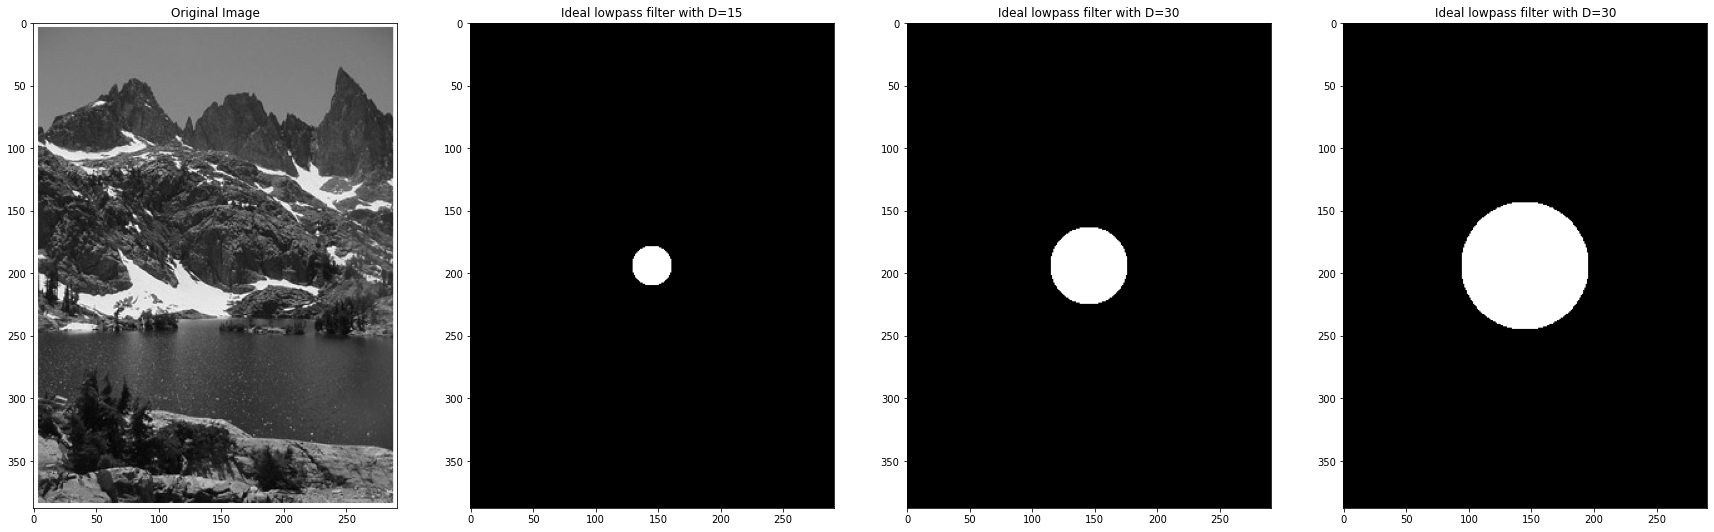

In [431]:
def ideal(img,D):
    img = np.zeros_like(img,dtype='int')
    im = img.copy()
    R= img.shape[0]
    C= img.shape[1]
    u=img.copy()
    for x in range(R):
        for y in range(C):
            t = x**2 + y**2
            im[x,y] = np.sqrt(t)
    for i in range(R):
        for j in range(C):
            thresX = (i - (img.shape[0]//2))
            thresY = j - (img.shape[1]//2)
            temp = im[np.abs(thresX),np.abs(thresY)]
            img[i,j] = temp<=D
    return img

img = cv2.imread('lakeside.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
out = np.fft.fft2(img)

out1 = ideal(np.fft.fftshift(out),15)
out2 = ideal(np.fft.fftshift(out),30)
out3 = ideal(np.fft.fftshift(out),50)

# Plotting
plt.figure(figsize = (30,20))

plt.subplot(141)
plt.imshow(img,cmap='gray')
plt.title('Original Image')
plt.subplot(142)
plt.imshow(out1,cmap='gray')
plt.title('Ideal lowpass filter with D=15')
plt.subplot(143)
plt.imshow(out2,cmap='gray')
plt.title('Ideal lowpass filter with D=30')
plt.subplot(144)
plt.imshow(out3, cmap='gray')
plt.title('Ideal lowpass filter with D=30')

### Ideal Lowpass Filter is used for image smoothing in the frequency domain. It removes high-frequency noise from a digital image and preserves low-frequency components. from the origin without attenuation and cuts off all the frequencies outside the circle. 

Text(0.5, 1.0, 'Gaussian filter with D=30')

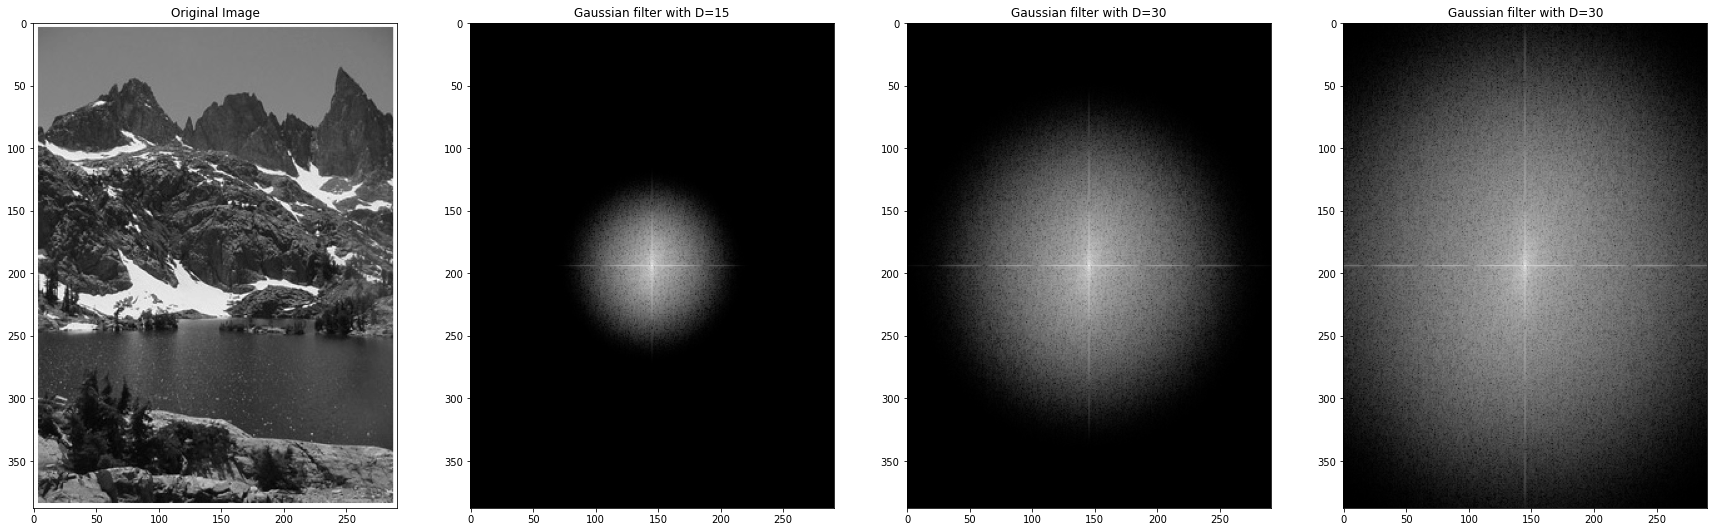

In [449]:
def gaussian(img,D):
    out = np.zeros_like(img,dtype='complex64')
    other = out.copy()
    R= img.shape[0]
    C= img.shape[1]
    u = img.copy()
    for x in range(R):
        for y in range(C):
            t = x**2 + y**2
            other[x,y] = np.sqrt(t)
    for i in range(R):
        for j in range(C):
            thresX = (i - (img.shape[0]//2))
            thresY = j - (img.shape[1]//2)
            val = other[np.abs(thresX),np.abs(thresY)]
            expr = -(val**2)/(2*D**2)
            out[i,j] = np.exp(expr)*img[i,j]
    return out

img = cv2.imread('lakeside.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
out = np.fft.fft2(img) 
output1 = gaussian(np.fft.fftshift(out),15)
output2 = gaussian(np.fft.fftshift(out),30)
output3 = gaussian(np.fft.fftshift(out),50)
out1=np.log(1 + np.abs(output1))
out2=np.log(1 + np.abs(output2))
out3=np.log(1 + np.abs(output3))

# Plotting
plt.figure(figsize = (30,20))

plt.subplot(141)
plt.imshow(img,cmap='gray')
plt.title('Original Image')
plt.subplot(142)
plt.imshow(out1,cmap='gray')
plt.title('Gaussian filter with D=15')
plt.subplot(143)
plt.imshow(out2,cmap='gray')
plt.title('Gaussian filter with D=30')
plt.subplot(144)
plt.imshow(out3, cmap='gray')
plt.title('Gaussian filter with D=30')


### A Gaussian Filter is a low pass filter used for reducing noise (high frequency components) and blurring regions of an image. The filter is implemented as an Odd sized Symmetric Kernel (DIP version of a Matrix) which is passed through each pixel of the Region of Interest to get the desired effect.

## 5.3
### The cut-off radius increasing images keeps becoming sharper.The blurring increases as well. Similar pattern is observed for both ideal and gaissian filter. The blurring is not that visibily seen in case of gaussian filter however. 

# **Question 6**
# The Broken Scanner and Smart Jim

A low pass filter is the basis for most smoothing methods. An image is smoothed by decreasing the disparity between pixel values by averaging nearby pixels. Using a low pass filter tends to retain the low frequency information within an image while reducing the high frequency information.

Hence we will be using a low pass filter to transform the image. 
The blurring is not that visibily seen in case of gaussian filter, hence we will be trying out the gaussian filter. 

Text(0.5, 1.0, 'Gaussian filter with D=50')

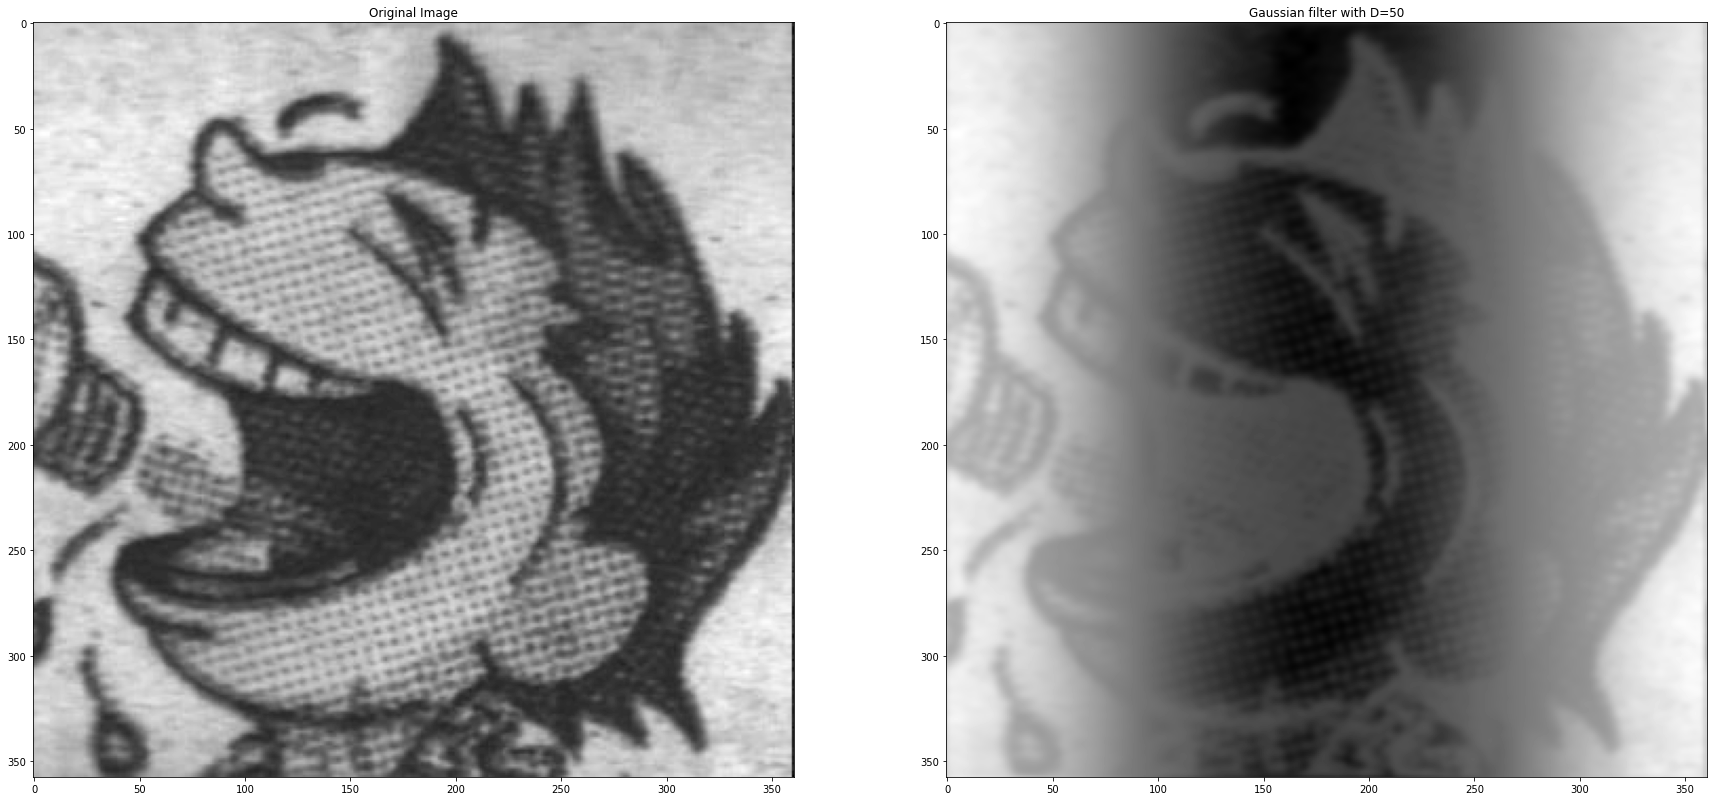

In [455]:
img = cv2.imread('cart.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
out = np.fft.fft2(img) 
output1 = gaussian(np.fft.fftshift(out),50)
# out1=np.log(1 + np.abs(output1))
ogim = np.fft.ifft2(np.fft.fftshift(output1)).real
ogim = ogim[:img.shape[0],:img.shape[1]]

# Plotting
plt.figure(figsize = (30,20))

plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(ogim,cmap='gray')
plt.title('Gaussian filter with D=50')